In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [142]:
start = dt.datetime(2024,2,1)
end = dt.datetime.today()
ticker = '^NSEI'

a = yf.download(ticker,start,end)
df = pd.DataFrame(a)

[*********************100%%**********************]  1 of 1 completed


In [143]:
df.drop(columns = ['Volume','Close','Open','High','Low'],inplace = True)
df.rename(columns = {'Adj Close':'Close'},inplace = True)

In [144]:
df['returns'] = df['Close'].pct_change()

df['gain'] = np.where(df['returns']>0,df['Close'].diff(),0)
df['loss'] = np.where(df['returns']<0,df['Close'].diff(),0)

df['avrg_gain'] = df['gain'].rolling(window = 10).mean()
df['avrg_loss'] = abs(df['loss'].rolling(window = 10).mean())

df['RS'] = df['avrg_gain'] / df['avrg_loss']
df['RSI'] = 100 - (100/(1 + df['RS']))

In [145]:
df['RSI'].mean()

55.94481752786251

In [146]:
df['RSI_mean'] = df['RSI'].mean()

In [147]:
df['stdev'] = df['RSI'].std()
df['mean'] = df['RSI'].rolling(window = 10).mean()

df['upper_band'] = df['mean'] + (0.5*df['stdev'])
df['lower_band'] = df['mean'] - (0.5*df['stdev'])

<Axes: xlabel='Date'>

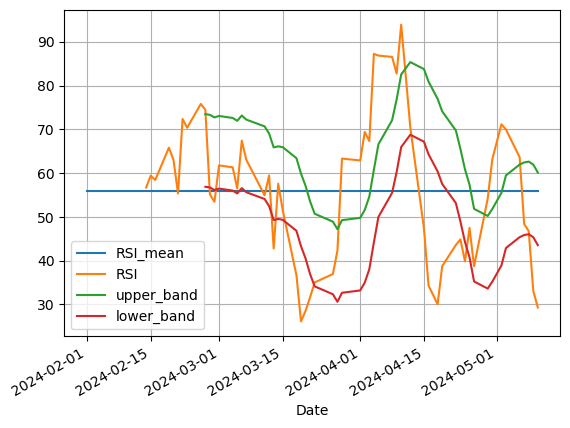

In [148]:
df[['RSI_mean','RSI','upper_band','lower_band']].plot(grid = True)

In [149]:
df['positions'] = np.where(df['RSI']>df['upper_band'],-1,0)
df['positions'] = np.where(df['RSI']<df['lower_band'],1,df['positions'])
df['positions'] = df['positions'].shift(1)

In [150]:
df['strategy_returns'] = df['positions']*df['returns']

In [151]:
df['returns'] = df['returns'] +1
df['strategy_returns'] = df['strategy_returns'] +1

<Axes: xlabel='Date'>

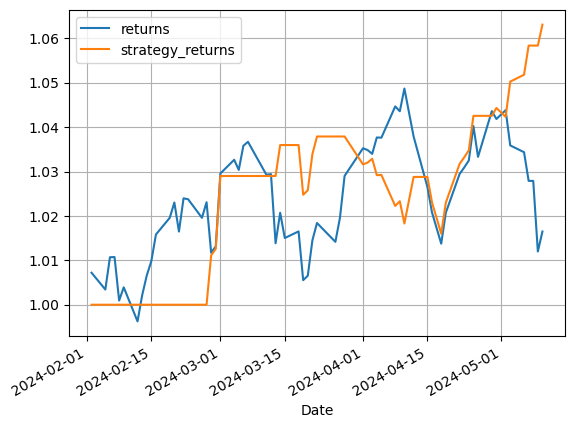

In [152]:
df[['returns','strategy_returns']].cumprod().plot(grid = True)

In [153]:
df['positions'].value_counts()

 0.0    35
-1.0    15
 1.0    15
Name: positions, dtype: int64

In [154]:
print(f"simple returns are {df['returns'].cumprod()[-1]}")
print(f"strategy returns are {df['strategy_returns'].cumprod()[-1]}")

simple returns are 1.0164881132520793
strategy returns are 1.0630702373309553


<Axes: xlabel='Date'>

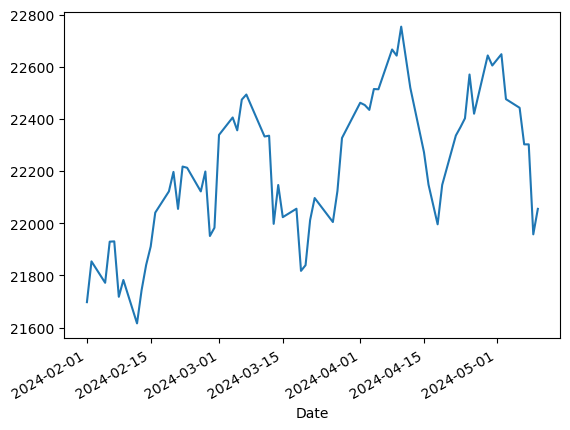

In [158]:
df['Close'].plot()